## Financial Inclusion in Africa

In this checkpoint, I am going to work on the **'Financial Inclusion in Africa'** dataset that was provided as part of the Financial Inclusion in Africa hosted by the Zindi platform.

Dataset description: The dataset contains demographic information and what financial services are used by approximately 33,600 individuals across East Africa. The ML model role is to predict which individuals are most likely to have or use a bank account.

The term financial inclusion means:  individuals and businesses have access to useful and affordable financial products and services that meet their needs – transactions, payments, savings, credit and insurance – delivered in a responsible and sustainable way.

➡️ Dataset link

https://i.imgur.com/UNUZ4zR.jpg

➡️Columns explanation


**Instructions**

1. Install the necessary packages
2. Import you data and perform basic data exploration phase
- Display general information about the dataset
- Create a pandas profiling reports to gain insights into the dataset
- Handle Missing and corrupted values
- Remove duplicates, if they exist
- Handle outliers, if they exist
- Encode categorical features
3. Based on the previous data exploration train and test a machine learning classifier
4. Create a streamlit application (locally) and add input fields for your features and a validation button at the end of the form
5. Import your ML model into the streamlit application and start making predictions given the provided features values
6. Deploy your application on Streamlit share:
- Create a github and a streamlit share accounts
- Create a new git repo
- Upload your local code to the newly created git repo
- log in to your streamlit account an deploy your application from the git repo

#### Importing necessary libraries

In [3]:
# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#### Loading the dataset

In [6]:
df = pd.read_csv(r"C:\Users\HP\Downloads\Financial_inclusion_dataset.csv")

#### Overview of the dataset

In [6]:
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [7]:
df.shape

(23524, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


##### Summary statistics

In [10]:
df.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


##### Checking for missing values and duplicates

In [12]:
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [13]:
df.duplicated().sum()

0

No missing values and duplicates Cool!

### Encoding

#### Binary Variables

In [17]:
df['bank_account'].value_counts()

bank_account
No     20212
Yes     3312
Name: count, dtype: int64

In [18]:
df['location_type'].value_counts()

location_type
Rural    14343
Urban     9181
Name: count, dtype: int64

In [19]:
df['cellphone_access'].value_counts()

cellphone_access
Yes    17454
No      6070
Name: count, dtype: int64

In [20]:
df['gender_of_respondent'].value_counts()

gender_of_respondent
Female    13877
Male       9647
Name: count, dtype: int64

#### Binary Encoding with Binary variables

In [22]:
df['bank_account'] = df['bank_account'].map({'Yes': 1, 'No': 0})
df['cellphone_access'] = df['cellphone_access'].map({'Yes': 1, 'No': 0})
df['gender_of_respondent'] = df['gender_of_respondent'].map({'Female': 0, 'Male': 1})
df['location_type'] = df['location_type'].map({'Rural': 0, 'Urban': 1})

#### Multi-category Variables

In [25]:
df['marital_status'].value_counts()

marital_status
Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: count, dtype: int64

In [26]:
df['education_level'].value_counts()

education_level
Primary education                  12791
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: count, dtype: int64

In [27]:
df['job_type'].value_counts()

job_type
Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: count, dtype: int64

#### One-Hot Encoding for multi-category variables

In [29]:
df = pd.get_dummies(df, columns=['job_type'], drop_first=True)

In [30]:
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,...,education_level,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,Kenya,2018,uniqueid_1,1,0,1,3,24,0,Spouse,...,Secondary education,False,False,False,False,False,False,False,False,True
1,Kenya,2018,uniqueid_2,0,0,0,5,70,0,Head of Household,...,No formal education,False,False,False,True,False,False,False,False,False
2,Kenya,2018,uniqueid_3,1,1,1,5,26,1,Other relative,...,Vocational/Specialised training,False,False,False,False,False,False,False,False,True
3,Kenya,2018,uniqueid_4,0,0,1,5,34,0,Head of Household,...,Primary education,False,False,True,False,False,False,False,False,False
4,Kenya,2018,uniqueid_5,0,1,0,8,26,1,Child,...,Primary education,False,False,False,False,True,False,False,False,False


#### Feature Engineering

In [32]:
df.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type_Farming and Fishing',
       'job_type_Formally employed Government',
       'job_type_Formally employed Private', 'job_type_Government Dependent',
       'job_type_Informally employed', 'job_type_No Income',
       'job_type_Other Income', 'job_type_Remittance Dependent',
       'job_type_Self employed'],
      dtype='object')

In [33]:
df['has_income'] = df[['job_type_Farming and Fishing', 'job_type_Formally employed Government', 'job_type_Formally employed Private', 
                       'job_type_Informally employed', 'job_type_Other Income', 'job_type_Self employed'  ]].sum(axis=1)

In [34]:
df['is_married'] = df['marital_status'].apply(lambda x: 1 if x == 'Married/Living together' else 0)
df['is_single'] = df['marital_status'].apply(lambda x: 1 if x == 'Single/Never Married' else 0)

In [35]:
# Creating binary columns for each education level
df['primary_education'] = df['education_level'].apply(lambda x: 1 if x == 'Primary education' else 0)
df['no_education'] = df['education_level'].apply(lambda x: 1 if x == 'No formal education' else 0)
df['secondary_education'] = df['education_level'].apply(lambda x: 1 if x == 'Secondary education' else 0)
df['tertiary_education'] = df['education_level'].apply(lambda x: 1 if x == 'Tertiary education' else 0)
df['vocational_training'] = df['education_level'].apply(lambda x: 1 if x == 'Vocational/Specialised training' else 0)
df['other_education'] = df['education_level'].apply(lambda x: 1 if x == 'Other/Dont know/RTA' else 0)

#### Correlation matrix to check linear relationship

In [37]:
# Selecting only numeric columns for correlation
numeric_df = df.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr()

In [38]:
correlation_matrix

,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,has_income,is_married,is_single,primary_education,no_education,secondary_education,tertiary_education,vocational_training,other_education
year,1.000000,0.112318,0.214621,-0.066505,-0.052264,-0.019330,0.000317,-0.119848,-0.005174,0.022470,-0.080300,-0.095970,0.118902,0.040560,0.129668,-0.004110
bank_account,0.112318,1.000000,0.087288,0.209669,-0.028326,0.019429,0.117234,0.061478,0.086518,-0.040771,-0.173702,-0.142661,0.123702,0.241958,0.232187,0.019255
location_type,0.214621,0.087288,1.000000,-0.085238,-0.257284,-0.047373,0.012924,-0.062116,-0.236190,0.268959,-0.017513,-0.090530,0.043332,0.084803,0.050682,0.005291
cellphone_access,-0.066505,0.209669,-0.085238,1.000000,0.091360,-0.103611,0.102370,0.135227,0.158290,-0.065682,-0.009652,-0.204751,0.120163,0.099981,0.099093,-0.007483
household_size,-0.052264,-0.028326,-0.257284,0.091360,1.000000,-0.129729,0.014576,0.004957,0.314821,-0.161510,-0.017150,-0.016943,0.096128,-0.079218,-0.025579,0.002519
age_of_respondent,-0.019330,0.019429,-0.047373,-0.103611,-0.129729,1.000000,0.012745,0.028860,0.053767,-0.296633,-0.071953,0.360651,-0.210338,-0.091143,-0.037137,0.025557
gender_of_respondent,0.000317,0.117234,0.012924,0.102370,0.014576,0.012745,1.000000,0.146319,0.056201,0.086199,0.019350,-0.114902,0.057692,0.041775,0.025083,-0.003034
has_income,-0.119848,0.061478,-0.062116,0.135227,0.004957,0.028860,0.146319,1.000000,0.153847,-0.094831,0.114937,-0.024810,-0.108540,-0.031677,0.006161,-0.002324
is_married,-0.005174,0.086518,-0.236190,0.158290,0.314821,0.053767,0.056201,0.153847,1.000000,-0.657426,0.038260,-0.008467,0.005193,-0.092213,0.009907,0.011086
is_single,0.022470,-0.040771,0.268959,-0.065682,-0.161510,-0.296633,0.086199,-0.094831,-0.657426,1.000000,0.028174,-0.159623,0.077408,0.079033,0.014090,-0.013690


#### Variance Threshold to eliminate low variance features

In [40]:
from sklearn.feature_selection import VarianceThreshold

# Separate the features (X) and the target variable (y)
X = df.drop(columns=['country', 'uniqueid', 'gender_of_respondent', 'relationship_with_head', 'marital_status', 'education_level', 'bank_account'])
y = df['bank_account']

# Create the VarianceThreshold object with a specified threshold
selector = VarianceThreshold(threshold=0.1)

# Fit the model on the feature data
X_var_thresh = selector.fit_transform(X)

# Check which features remain
remaining_features = X.columns[selector.get_support()]
print(remaining_features)


Index(['year', 'location_type', 'cellphone_access', 'household_size',
       'age_of_respondent', 'job_type_Farming and Fishing',
       'job_type_Informally employed', 'job_type_Self employed', 'has_income',
       'is_married', 'is_single', 'primary_education', 'no_education',
       'secondary_education'],
      dtype='object')


### Modelling

#### Logistic Regression(Lasso- Least Absolute Shrinkage and Selection Operator) Embedded Method

To select my best features

In [425]:
from sklearn.linear_model import LogisticRegression

Selecting my features and splitting the data into training and test sets

In [428]:
X = df.drop(columns=['year', 'country', 'uniqueid', 'gender_of_respondent', 'relationship_with_head', 'marital_status', 
                    'education_level', 'vocational_training', 'bank_account', 'job_type_Remittance Dependent',])

y = df['bank_account']

In [430]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

In [452]:
print(X_train.columns)

Index(['location_type', 'cellphone_access', 'household_size',
       'age_of_respondent', 'job_type_Farming and Fishing',
       'job_type_Formally employed Government',
       'job_type_Formally employed Private', 'job_type_Government Dependent',
       'job_type_Informally employed', 'job_type_No Income',
       'job_type_Other Income', 'job_type_Self employed', 'has_income',
       'is_married', 'is_single', 'primary_education', 'no_education',
       'secondary_education', 'tertiary_education', 'other_education'],
      dtype='object')


This time we are using the logistic regression model with a penalty = l1 which is used to reduce loss or error in the model

In [433]:
model= LogisticRegression(penalty = 'l1', C = 1.0, solver = 'liblinear')
model.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [434]:
y_pred = model.predict(X_test)

In [437]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [439]:
ACC = accuracy_score(y_pred, y_test)
ACC

0.8852284803400637

In [441]:
conf_mat = confusion_matrix(y_pred, y_test)
conf_mat

array([[3978,  455],
       [  85,  187]], dtype=int64)

In [443]:
class_report = classification_report(y_pred, y_test)
print(class_report)

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      4433
           1       0.29      0.69      0.41       272

    accuracy                           0.89      4705
   macro avg       0.64      0.79      0.67      4705
weighted avg       0.94      0.89      0.91      4705



In [445]:
model.coef_

array([[ 0.37773283,  1.95612943, -0.03272953,  0.02465695, -0.27719525,
         1.64516917,  1.15670113,  1.350626  , -0.59562139, -1.37109652,
         0.03202028, -0.19392638,  0.61324697,  0.55101111, -0.03239648,
        -1.97686757, -2.79992852, -0.87249047,  0.18448802, -0.15740736]])

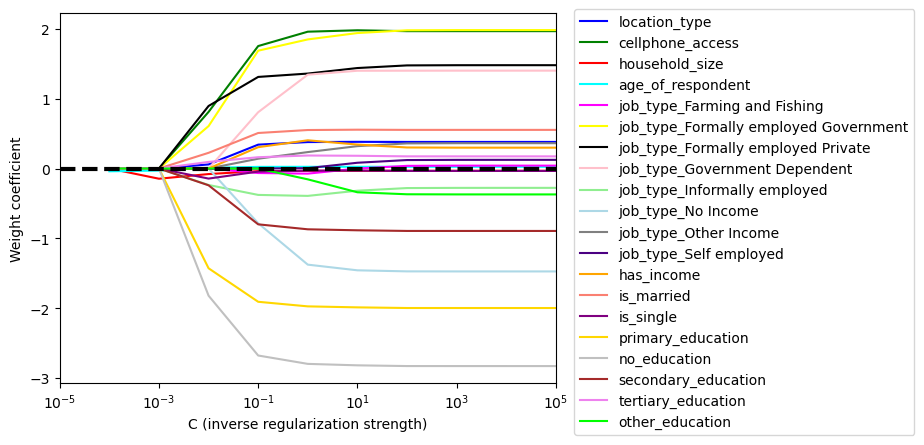

In [447]:
import numpy as np
import matplotlib.pyplot as plt

# Define the figure and axis
fig = plt.figure()
ax = plt.subplot(111)

# 28 color definitions
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 
          'black', 'pink', 'lightgreen', 'lightblue', 'gray', 
          'indigo', 'orange', 'salmon', 'purple', 'gold', 
          'silver', 'brown', 'violet', 'lime', 'teal', 
          'navy', 'maroon', 'olive', 'coral', 'chocolate', 
          'crimson', 'darkblue']

weights, params = [], []

# Loop through regularization strengths
for c in np.arange(-4., 6.):
    model2 = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', random_state=42)
    model2.fit(X_train, y_train)
    weights.append(model2.coef_)
    params.append(10**c)

weights = np.array(weights)

# Plot each column's weights using the color list
for column, color in zip(range(weights.shape[2]), colors):  # Use shape[2] for correct column size
    plt.plot(params, weights[:, 0, column],  # Access weights by [:, 0, column] for 2D plot
             label=X.columns[column],  # Ensure X.columns has the right size
             color=color)

# Add horizontal line at y=0
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Weight coefficient')
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc='upper left')

# Set the position of the legend
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)

# Save the figure
plt.savefig('lasso-path.pdf', dpi=300, bbox_inches='tight', pad_inches=0.2)

# Show the plot
plt.show()


#### Saving my model

In [454]:
import joblib

In [456]:
joblib.dump(model, 'model.pkl')

['model.pkl']